# Histogram by high and low entropy

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
ind_data=pd.read_stata('regression_analysis_ind_with_ent_sent_jan18.dta')

In [44]:
ind_data['ent_others'].describe()

count    3834.000000
mean        0.313015
std         0.153200
min         0.080485
25%         0.216225
50%         0.273644
75%         0.348832
max         1.070593
Name: ent_others, dtype: float64

In [45]:
#gapminder['gdpPercap_ind'] = gapminder.gdpPercap.apply(lambda x: 1 if x >= 1000 else 0)

ind_data['high_ent_others']=ind_data.ent_others.apply(lambda x: 1 if x>=0.22 else 0) 

In [46]:
ind_data.high_ent_others.describe()

count    3834.000000
mean        0.731090
std         0.443451
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: high_ent_others, dtype: float64

In [47]:
ind_data.head()
ind_data=ind_data[ind_data['ent_others']>0]

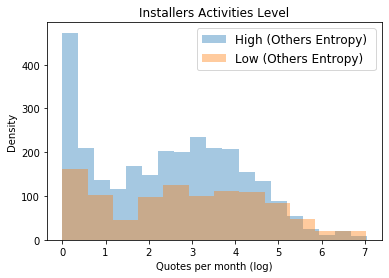

In [51]:
df=ind_data[ind_data['high_ent_others']==1]
sns.distplot(df['log_quotes'].dropna(),kde=False,label='High (Others Entropy) ')
df=ind_data[ind_data['high_ent_others']==0]
sns.distplot(df['log_quotes'].dropna(),kde=False,label='Low (Others Entropy)')
plt.legend(prop={'size':12})
plt.title('Installers Activities Level')
plt.xlabel('Quotes per month (log)')
plt.ylabel('Density')
plt.savefig('histogram_by_high_low_ent.png', dpi=400)

# Histogram 

In [4]:
ind_data=pd.read_stata('regression_analysis_ind_with_ent_sent_jan18.dta')

In [49]:
ind_data.describe()

,avg,avg_sent_score,five,four,installer_id,market,one,quotes_count,reviews_ct,three,...,text_d_others_mean,text_d_others_std,text_d_others_min,text_d_others_p25,text_d_others_p50,text_d_others_p75,text_d_others_max,missing_avg_sent,missing_avg_sent_others,missing_avg_sent_mkt
count,4953.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,...,6578.000000,6234.000000,6.578000e+03,6578.000000,6578.000000,6578.000000,6578.000000,8113.000000,8113.000000,8113.000000
mean,4.880354,0.417186,3.186614,0.118205,17971.731912,17.784667,0.054111,29.013435,3.397387,0.021694,...,0.136415,0.060909,3.915281e-02,0.096662,0.124417,0.163381,0.390108,0.393936,0.185751,0.139159
std,0.397168,0.356765,5.435763,0.495746,6707.006717,13.486967,0.325458,82.907146,5.802350,0.150681,...,0.024671,0.017610,3.840397e-02,0.024730,0.027016,0.032697,0.160069,0.488639,0.388941,0.346120
min,1.000000,-0.826800,0.000000,0.000000,108.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.054564,0.003260,-1.192093e-07,0.054031,0.054564,0.054564,0.054564,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,20131.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.128786,0.053564,5.970478e-03,0.086053,0.114733,0.152239,0.273385,0.000000,0.000000,0.000000
50%,5.000000,0.603031,1.000000,0.000000,20627.000000,17.000000,0.000000,5.000000,1.000000,0.000000,...,0.134889,0.064009,3.563923e-02,0.092196,0.120452,0.161853,0.401740,0.000000,0.000000,0.000000
75%,5.000000,0.727683,4.000000,0.000000,21350.000000,33.000000,0.000000,22.000000,4.000000,0.000000,...,0.142438,0.071291,5.450624e-02,0.098243,0.128108,0.174495,0.526690,1.000000,0.000000,0.000000
max,5.000000,0.957600,47.000000,6.000000,23027.000000,36.000000,5.000000,1417.000000,52.000000,2.000000,...,0.281703,0.159244,2.546176e-01,0.254618,0.365879,0.371879,0.756485,1.000000,1.000000,1.000000


# Hisgogram of individual  reviews 
The maximum number of reviews an installer has ever received in this dataset 

In [13]:
ind_maxreviews=ind_data[ind_data['ent_others']>0].groupby(['installer_id'],sort=False)['reviews_ct'].max()

In [18]:
ind_maxreviews.describe()

count    307.000000
mean       6.850163
std        8.482413
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       52.000000
Name: reviews_ct, dtype: float64

In [19]:
ind_maxreviews.isin([0]).sum()

11

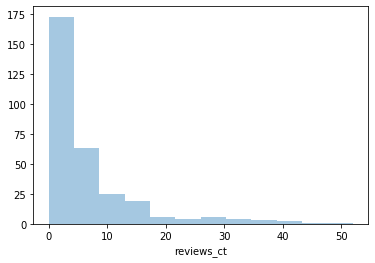

In [24]:
sns.distplot(ind_maxreviews.dropna(),kde=False,bins=12,label='Individual Reviews')

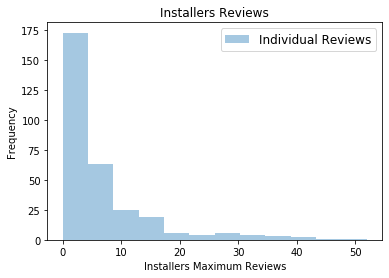

In [25]:
sns.distplot(ind_maxreviews.dropna(),kde=False,bins=12,label='Individual Reviews')

plt.legend(prop={'size':12})
plt.title('Installers Reviews')
plt.xlabel('Installers Maximum Reviews')
plt.ylabel('Frequency')
plt.savefig('histogram_ind_max_reviews_ct', dpi=400)

## Most represented states 

 NUMBER OF INSTALLERS IN EACH STATE FOR TOP 10 STATES}

In [37]:
bystate_count=ind_data.groupby(['state'],sort=False)(['installer_id'].nunique()


In [44]:
bystate_count.sort_values()[-10:]

state
CT    10
MD    10
CO    13
NC    16
FL    21
NJ    26
TX    27
NY    32
MA    36
CA    95
Name: installer_id, dtype: int64

In [ ]:
bystate_count=ind_data.groupby(['state'],sort=False)(['installer_id'].nunique()
                                                     
                                                     

In [58]:
 ind_data.groupby('state').agg({'reviews_ct': ['sum'], 'installer_id': 'nunique','winning_quotes_count':'sum','quotes_count':'sum'}).sort_values(by=[('reviews_ct','sum')])

,reviews_ct,installer_id,winning_quotes_count,quotes_count
,sum,nunique,sum,sum
state,,,,
IN,2.0,1,2.0,324.0
WI,3.0,1,0.0,3.0
DE,15.0,1,0.0,24.0
GA,30.0,2,2.0,483.0
MO,31.0,3,5.0,391.0
NH,49.0,2,5.0,134.0
LA,74.0,2,22.0,1476.0
VT,98.0,3,2.0,54.0


In [59]:
 ind_data.groupby('state').agg({'reviews_ct': ['sum'], 'installer_id': 'nunique','winning_quotes_count':'sum','quotes_count':'sum'}).sort_values(by=[('reviews_ct','sum')]).to_csv('aggstate.csv')

## Scatter plot of text based vs ratings based dispersion measures

In [6]:
ind_data.describe()

,avg,avg_sent_score,five,four,installer_id,market,one,quotes_count,reviews_ct,three,...,text_d_others_mean,text_d_others_std,text_d_others_min,text_d_others_p25,text_d_others_p50,text_d_others_p75,text_d_others_max,missing_avg_sent,missing_avg_sent_others,missing_avg_sent_mkt
count,4953.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,...,6578.000000,6234.000000,6.578000e+03,6578.000000,6578.000000,6578.000000,6578.000000,8113.000000,8113.000000,8113.000000
mean,4.880354,0.417186,3.186614,0.118205,17971.731912,17.784667,0.054111,29.013435,3.397387,0.021694,...,0.136415,0.060909,3.915281e-02,0.096662,0.124417,0.163381,0.390108,0.393936,0.185751,0.139159
std,0.397168,0.356765,5.435763,0.495746,6707.006717,13.486967,0.325458,82.907146,5.802350,0.150681,...,0.024671,0.017610,3.840397e-02,0.024730,0.027016,0.032697,0.160069,0.488639,0.388941,0.346120
min,1.000000,-0.826800,0.000000,0.000000,108.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.054564,0.003260,-1.192093e-07,0.054031,0.054564,0.054564,0.054564,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,20131.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.128786,0.053564,5.970478e-03,0.086053,0.114733,0.152239,0.273385,0.000000,0.000000,0.000000
50%,5.000000,0.603031,1.000000,0.000000,20627.000000,17.000000,0.000000,5.000000,1.000000,0.000000,...,0.134889,0.064009,3.563923e-02,0.092196,0.120452,0.161853,0.401740,0.000000,0.000000,0.000000
75%,5.000000,0.727683,4.000000,0.000000,21350.000000,33.000000,0.000000,22.000000,4.000000,0.000000,...,0.142438,0.071291,5.450624e-02,0.098243,0.128108,0.174495,0.526690,1.000000,0.000000,0.000000
max,5.000000,0.957600,47.000000,6.000000,23027.000000,36.000000,5.000000,1417.000000,52.000000,2.000000,...,0.281703,0.159244,2.546176e-01,0.254618,0.365879,0.371879,0.756485,1.000000,1.000000,1.000000


In [33]:
ind_data_scatter=ind_data[ind_data['ent_others']!=0]
ind_data_scatter=ind_data_scatter[ind_data_scatter['reviews_ct']>0]

In [35]:
ind_data_scatter.describe()

,avg,avg_sent_score,five,four,installer_id,market,one,quotes_count,reviews_ct,three,...,text_d_others_mean,text_d_others_std,text_d_others_min,text_d_others_p25,text_d_others_p50,text_d_others_p75,text_d_others_max,missing_avg_sent,missing_avg_sent_others,missing_avg_sent_mkt
count,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,...,3601.000000,3579.000000,3.601000e+03,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.0
mean,4.877069,0.684103,5.883643,0.208275,18988.649542,17.134129,0.093863,48.905582,6.247987,0.030547,...,0.137351,0.064935,2.259717e-02,0.093128,0.122678,0.164908,0.469104,0.002222,0.000833,0.0
std,0.417422,0.163831,6.770652,0.660344,6017.311897,14.494733,0.394502,110.425716,7.177928,0.181537,...,0.012247,0.011117,2.279743e-02,0.011277,0.013151,0.017642,0.135809,0.047087,0.028856,0.0
min,1.000000,-0.680800,0.000000,0.000000,363.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,...,0.084170,0.017716,-1.192093e-07,0.066206,0.081234,0.091858,0.094559,0.000000,0.000000,0.0
25%,5.000000,0.632760,2.000000,0.000000,20370.000000,4.000000,0.000000,2.000000,2.000000,0.000000,...,0.132078,0.059596,0.000000e+00,0.086607,0.116084,0.156180,0.388052,0.000000,0.000000,0.0
50%,5.000000,0.702780,4.000000,0.000000,21143.000000,17.000000,0.000000,13.000000,4.000000,0.000000,...,0.135118,0.066855,2.522814e-02,0.091710,0.120218,0.162023,0.477634,0.000000,0.000000,0.0
75%,5.000000,0.777200,7.000000,0.000000,21513.000000,34.000000,0.000000,46.000000,8.000000,0.000000,...,0.141164,0.071702,3.642780e-02,0.096251,0.126053,0.171166,0.552447,0.000000,0.000000,0.0
max,5.000000,0.957600,47.000000,6.000000,23027.000000,36.000000,4.000000,1142.000000,52.000000,2.000000,...,0.231656,0.114777,2.088488e-01,0.215858,0.267981,0.285372,0.756485,1.000000,1.000000,0.0


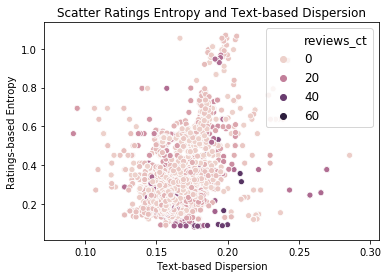

In [39]:

ax = sns.scatterplot(x="text_d_others_p75", y="ent_others",hue='reviews_ct',data=ind_data_scatter)

plt.legend(prop={'size':12})
plt.title('Scatter Ratings Entropy and Text-based Dispersion')
plt.xlabel('Text-based Dispersion')
plt.ylabel('Ratings-based Entropy')
plt.savefig('scatter_text_d_ent_mkt', dpi=400)

No handles with labels found to put in legend.


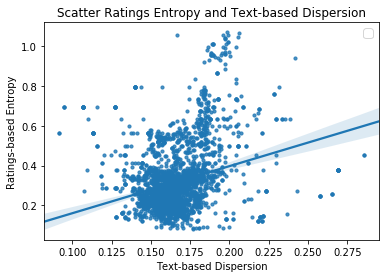

In [50]:

ax = sns.regplot(x="text_d_others_p75", y="ent_others",data=ind_data_scatter,scatter_kws={"s": 10})

plt.legend(prop={'size':12})
plt.title('Scatter Ratings Entropy and Text-based Dispersion')
plt.xlabel('Text-based Dispersion')
plt.ylabel('Ratings-based Entropy')
plt.savefig('regplot_text_d_ent_others', dpi=400)

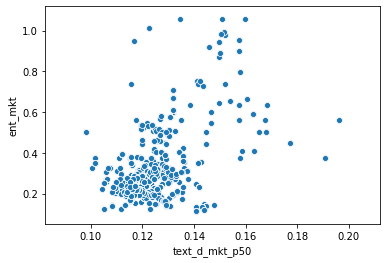

In [38]:
ax = sns.scatterplot(x="text_d_mkt_p50", y="ent_mkt",data=ind_data_scatter)